# Health risk prediction using machine learning

* Programming language : Python
* Libraries used :  Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn


## Description:
This project aims to develop a machine learning-based health risk prediction model integrated with personalized dietary recommendations. It leverages a rich dataset consisting of patient demographics, medical history, lifestyle habits, dietary patterns, and wearable device data to predict individual health risks (e.g., diabetes, hypertension, heart-related conditions) and recommend suitable diet plans.

By analyzing health markers such as BMI, blood pressure, cholesterol, blood sugar, and genetic predispositions, along with behavioral aspects like smoking, alcohol consumption, and exercise, the system calculates a health risk score. This score helps to identify high-risk individuals and support proactive dietary interventions.

# Key Features:
* Patient Demographics – Age, gender, height, weight, and BMI.
* Medical History – Chronic diseases, blood pressure, cholesterol, and genetic risk factors.
* Lifestyle Data – Daily steps, exercise frequency, sleep quality, alcohol and smoking habits.
* Dietary Intake – Caloric, protein, carbohydrate, and fat consumption.
* Food Preferences & Restrictions – Dietary habits, cuisine preferences, and food aversions.
* Wearable Device Data – Average heart rate, sleep quality, and activity level.
* Recommended Diet Plans – AI-driven diet recommendations tailored to patient conditions.
* Potential Use Cases:
* Machine learning models for personalized diet recommendation systems.
* Healthcare applications for chronic disease management.
* Nutritional studies analyzing the impact of diet on health outcomes.
* Integration into wearable health-tracking applications for real-time dietary advice.
* This dataset is structured in a CSV format, making it easy to preprocess and analyze for AI-driven health solutions.

# STEPS INVOLVED : 
1. Load dataset
2. Handle missing values
3. Visualize categorical variables (count plot, pie chart)
4. Detect & remove outliers
5. Create target variable [Feature Risk] (if derived from features)
6. Explore numeric data with visualizations (finding insights & explaining them)
7. Find correlation between numeric columns (heatmap)
8. Perform chi-square test on categorical columns (before encoding!)
9. Remove low-correlation & irrelevant features (feature selection based on correlation & chi-square)
10. Encode categorical columns (One-Hot Encoding, Label Encoding)
11. Train-test split (split data into train & test)
12. Feature scaling & normalization (MinMaxScaler, StandardScaler - only on training set, then apply

# 🔹 Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Personalized_Diet_Recommendations.csv')

df

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,...,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats,Recommended_Meal_Plan
0,P00001,56,Other,163,66,24.84,NaN,175,75,219,...,105,179,143,Western,NaN,2150,108,139,145,High-Protein Diet
1,P00002,69,Female,171,114,38.99,NaN,155,72,208,...,69,315,75,Mediterranean,NaN,1527,74,266,80,Balanced Diet
2,P00003,46,Female,172,119,40.22,NaN,137,101,171,...,183,103,148,Western,Sweet,2359,180,145,143,High-Protein Diet
3,P00004,32,Female,197,118,30.41,NaN,148,91,258,...,135,371,120,Western,NaN,2858,137,378,135,High-Protein Diet
4,P00005,60,Female,156,109,44.79,Hypertension,160,109,260,...,167,298,48,Indian,Spicy,1937,166,317,56,High-Protein Diet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,P04996,42,Female,172,99,33.46,NaN,115,78,279,...,59,356,64,Western,Spicy,2869,70,402,68,Low-Carb Diet
4996,P04997,39,Female,155,61,25.39,NaN,110,97,258,...,119,164,112,Indian,NaN,1138,131,213,107,Low-Carb Diet
4997,P04998,48,Female,165,61,22.41,Diabetes,113,82,183,...,50,351,41,Mediterranean,Spicy,2893,40,380,34,Low-Carb Diet
4998,P04999,34,Other,151,82,35.96,Heart Disease,105,75,248,...,50,397,131,Asian,Salty,2201,56,367,128,Low-Fat Diet


* checking the datatype of each columns

In [2]:
df.dtypes

Patient_ID                   object
Age                           int64
Gender                       object
Height_cm                     int64
Weight_kg                     int64
BMI                         float64
Chronic_Disease              object
Blood_Pressure_Systolic       int64
Blood_Pressure_Diastolic      int64
Cholesterol_Level             int64
Blood_Sugar_Level             int64
Genetic_Risk_Factor          object
Allergies                    object
Daily_Steps                   int64
Exercise_Frequency            int64
Sleep_Hours                 float64
Alcohol_Consumption          object
Smoking_Habit                object
Dietary_Habits               object
Caloric_Intake                int64
Protein_Intake                int64
Carbohydrate_Intake           int64
Fat_Intake                    int64
Preferred_Cuisine            object
Food_Aversions               object
Recommended_Calories          int64
Recommended_Protein           int64
Recommended_Carbs           

In [3]:
df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [4]:
#DROPPING RECOMMENDED MEAL PLAN SINCE WE DONT USE IT:

df.drop(columns=['Recommended_Meal_Plan'],axis=1,inplace=True)

# 🔹 Data Preprocessing

In [5]:
countint=[i for i in df.dtypes.values if i=='int64']
len(countint)  #17  integers in allergies

17

In [6]:
countobj=[i for i in df.dtypes.values if i=='object']
len(countobj) #11 objects in allergies

10

In [7]:
countfloat=[i for i in df.dtypes.values if i=='float64']
len(countfloat) #2 float in Allergies

2

Checking for Missing Values

In [8]:
df.isna().sum()

Patient_ID                     0
Age                            0
Gender                         0
Height_cm                      0
Weight_kg                      0
BMI                            0
Chronic_Disease             2043
Blood_Pressure_Systolic        0
Blood_Pressure_Diastolic       0
Cholesterol_Level              0
Blood_Sugar_Level              0
Genetic_Risk_Factor            0
Allergies                   3497
Daily_Steps                    0
Exercise_Frequency             0
Sleep_Hours                    0
Alcohol_Consumption            0
Smoking_Habit                  0
Dietary_Habits                 0
Caloric_Intake                 0
Protein_Intake                 0
Carbohydrate_Intake            0
Fat_Intake                     0
Preferred_Cuisine              0
Food_Aversions              1225
Recommended_Calories           0
Recommended_Protein            0
Recommended_Carbs              0
Recommended_Fats               0
dtype: int64

* "Converted NaN values to 'None' because in this dataset, NaN indicates that the person does not have any allergies. 
* Since 3497 out of 5000 rows were NaN in 'Allergies' and 2043 rows for Chronic_Disease, replacing them with 'None' ensures clarity and consistency in data interpretation."

In [9]:
df[df['Allergies'].isna()].head(4)                #'NaN in Chronic_Disease

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,...,Caloric_Intake,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats
0,P00001,56,Other,163,66,24.84,NaN,175,75,219,...,2593,105,179,143,Western,NaN,2150,108,139,145
1,P00002,69,Female,171,114,38.99,NaN,155,72,208,...,1852,69,315,75,Mediterranean,NaN,1527,74,266,80
4,P00005,60,Female,156,109,44.79,Hypertension,160,109,260,...,2405,167,298,48,Indian,Spicy,1937,166,317,56
5,P00006,25,Female,189,99,27.71,Diabetes,146,100,237,...,3487,75,124,56,Indian,NaN,3179,78,85,63


In [10]:
df['Allergies']=df['Allergies'].fillna('None')

In [11]:
df[df['Chronic_Disease'].isna()].head(4)

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,...,Caloric_Intake,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats
0,P00001,56,Other,163,66,24.84,NaN,175,75,219,...,2593,105,179,143,Western,NaN,2150,108,139,145
1,P00002,69,Female,171,114,38.99,NaN,155,72,208,...,1852,69,315,75,Mediterranean,NaN,1527,74,266,80
2,P00003,46,Female,172,119,40.22,NaN,137,101,171,...,2737,183,103,148,Western,Sweet,2359,180,145,143
3,P00004,32,Female,197,118,30.41,NaN,148,91,258,...,3289,135,371,120,Western,NaN,2858,137,378,135


In [12]:
df['Chronic_Disease']=df['Chronic_Disease'].fillna('None')

In [13]:
df['Food_Aversions']=df['Food_Aversions'].fillna('None')

In [14]:
df[['Allergies','Chronic_Disease','Food_Aversions']]

,Allergies,Chronic_Disease,Food_Aversions
0,None,None,None
1,None,None,None
2,Gluten Intolerance,None,Sweet
3,Nut Allergy,None,None
4,None,Hypertension,Spicy
...,...,...,...
4995,Gluten Intolerance,None,Spicy
4996,Gluten Intolerance,None,None
4997,Nut Allergy,Diabetes,Spicy
4998,None,Heart Disease,Salty


In [15]:
df.isna().sum()

Patient_ID                  0
Age                         0
Gender                      0
Height_cm                   0
Weight_kg                   0
BMI                         0
Chronic_Disease             0
Blood_Pressure_Systolic     0
Blood_Pressure_Diastolic    0
Cholesterol_Level           0
Blood_Sugar_Level           0
Genetic_Risk_Factor         0
Allergies                   0
Daily_Steps                 0
Exercise_Frequency          0
Sleep_Hours                 0
Alcohol_Consumption         0
Smoking_Habit               0
Dietary_Habits              0
Caloric_Intake              0
Protein_Intake              0
Carbohydrate_Intake         0
Fat_Intake                  0
Preferred_Cuisine           0
Food_Aversions              0
Recommended_Calories        0
Recommended_Protein         0
Recommended_Carbs           0
Recommended_Fats            0
dtype: int64

# ▫️ Understanding Categorical Data: Frequency & Trends

In [16]:
df.dtypes

Patient_ID                   object
Age                           int64
Gender                       object
Height_cm                     int64
Weight_kg                     int64
BMI                         float64
Chronic_Disease              object
Blood_Pressure_Systolic       int64
Blood_Pressure_Diastolic      int64
Cholesterol_Level             int64
Blood_Sugar_Level             int64
Genetic_Risk_Factor          object
Allergies                    object
Daily_Steps                   int64
Exercise_Frequency            int64
Sleep_Hours                 float64
Alcohol_Consumption          object
Smoking_Habit                object
Dietary_Habits               object
Caloric_Intake                int64
Protein_Intake                int64
Carbohydrate_Intake           int64
Fat_Intake                    int64
Preferred_Cuisine            object
Food_Aversions               object
Recommended_Calories          int64
Recommended_Protein           int64
Recommended_Carbs           

1. Gender Distribution in the Datase

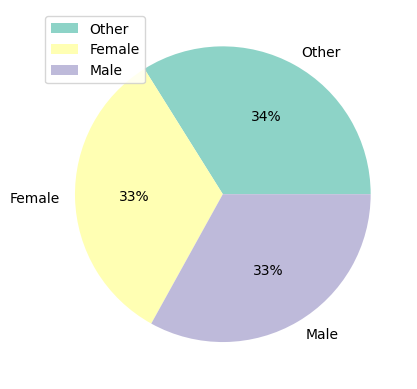

In [17]:
x=df['Gender'].value_counts()
lab=['Other','Female','Male']

color = sns.color_palette('Set3', n_colors=len(lab))
plt.pie(x=x.values,labels=lab,autopct='%1.0f%%',colors=color)
plt.legend(loc='upper left')



#sns.color_palette(...)   Seaborn provides many built-in color palettes
#Retrieves the Set2 color palette from Seaborn.
#By setting n_colors to the number of labels, you ensure that you get a unique color for each slice of your pie chart.

# Health Behavior by Gender
* Insight: Are more males/females smokers?
* SMOKING

<Axes: xlabel='Smoking_Habit', ylabel='count'>

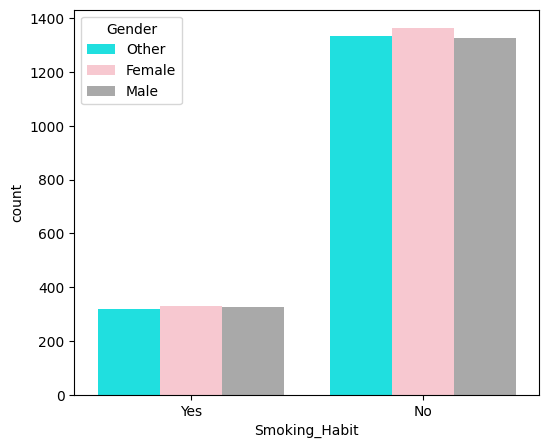

In [18]:
plt.figure(figsize=(6,5))
color=['Cyan','Pink','DarkGray']
sns.countplot(x='Smoking_Habit',data=df,palette=color,hue='Gender')

* Alcohol_Consumption

<Axes: xlabel='Alcohol_Consumption', ylabel='count'>

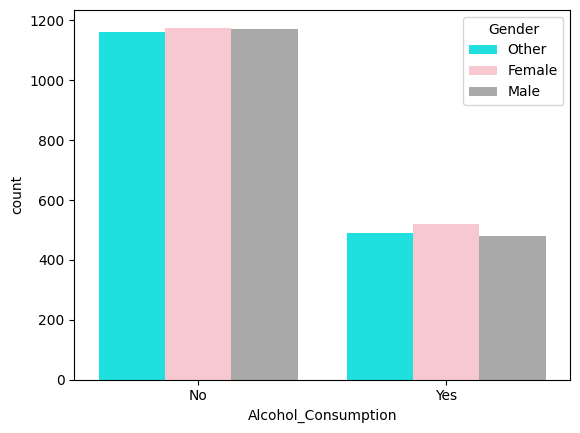

In [19]:
color=['Cyan','Pink','DarkGray']
sns.countplot(x='Alcohol_Consumption',data=df,hue='Gender',palette=color)


* BMI vs Weight

Text(0.5, 1.0, 'Distribution of BMI by Weight')

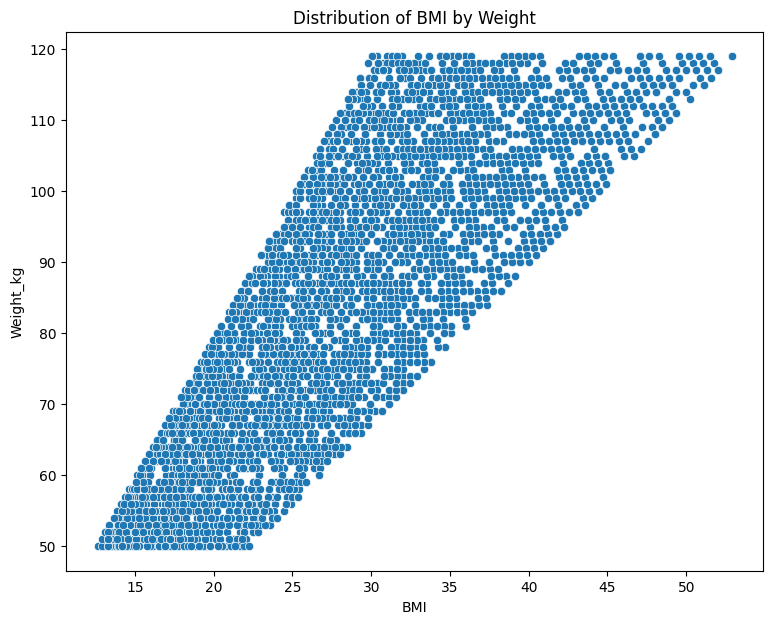

In [20]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=df,x='BMI',y='Weight_kg')
plt.title("Distribution of BMI by Weight")

## REMOVING OUTLIERS

Creating a list out outlier columns which are float and intigers 

In [21]:
outlier_columns=[i for i in df if df[i].dtype in ['int64','float64']]
print(outlier_columns) #len =19

['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_Level', 'Blood_Sugar_Level', 'Daily_Steps', 'Exercise_Frequency', 'Sleep_Hours', 'Caloric_Intake', 'Protein_Intake', 'Carbohydrate_Intake', 'Fat_Intake', 'Recommended_Calories', 'Recommended_Protein', 'Recommended_Carbs', 'Recommended_Fats']


# handled the features: `Daily_Steps`, `Caloric_Intake`, and `Recommended_Calories` separately because they operate on a significantly larger numerical scale compared to other variables.
These columns displayed a **wider spread and higher values**, which could dominate the visualization if included in a combined boxplot with smaller-scale features.

In [22]:
df[outlier_columns].agg(['min','max']).T

#You can easily display the minimum and maximum values of multiple columns together using .agg()

,min,max
Age,18.00,79.00
Height_cm,150.00,199.00
Weight_kg,50.00,119.00
BMI,12.63,52.89
Blood_Pressure_Systolic,90.00,179.00
Blood_Pressure_Diastolic,60.00,119.00
Cholesterol_Level,150.00,299.00
Blood_Sugar_Level,70.00,249.00
Daily_Steps,2004.00,14997.00
Exercise_Frequency,0.00,6.00


# `Box PlOt`

Text(0.5, 1.0, 'Boxplot for Large scale numericl features')

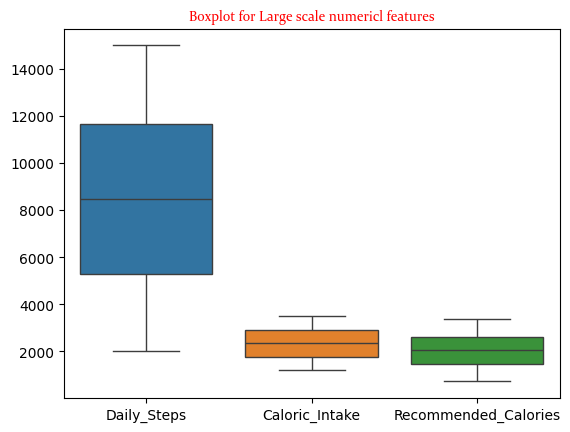

In [23]:
#column for Large scale numericl features

large_outlier_col=['Daily_Steps','Caloric_Intake','Recommended_Calories']

sns.boxplot(data=df[large_outlier_col])
plt.title("Boxplot for Large scale numericl features",fontsize=10,fontname='Constantia',color='red')


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500')])

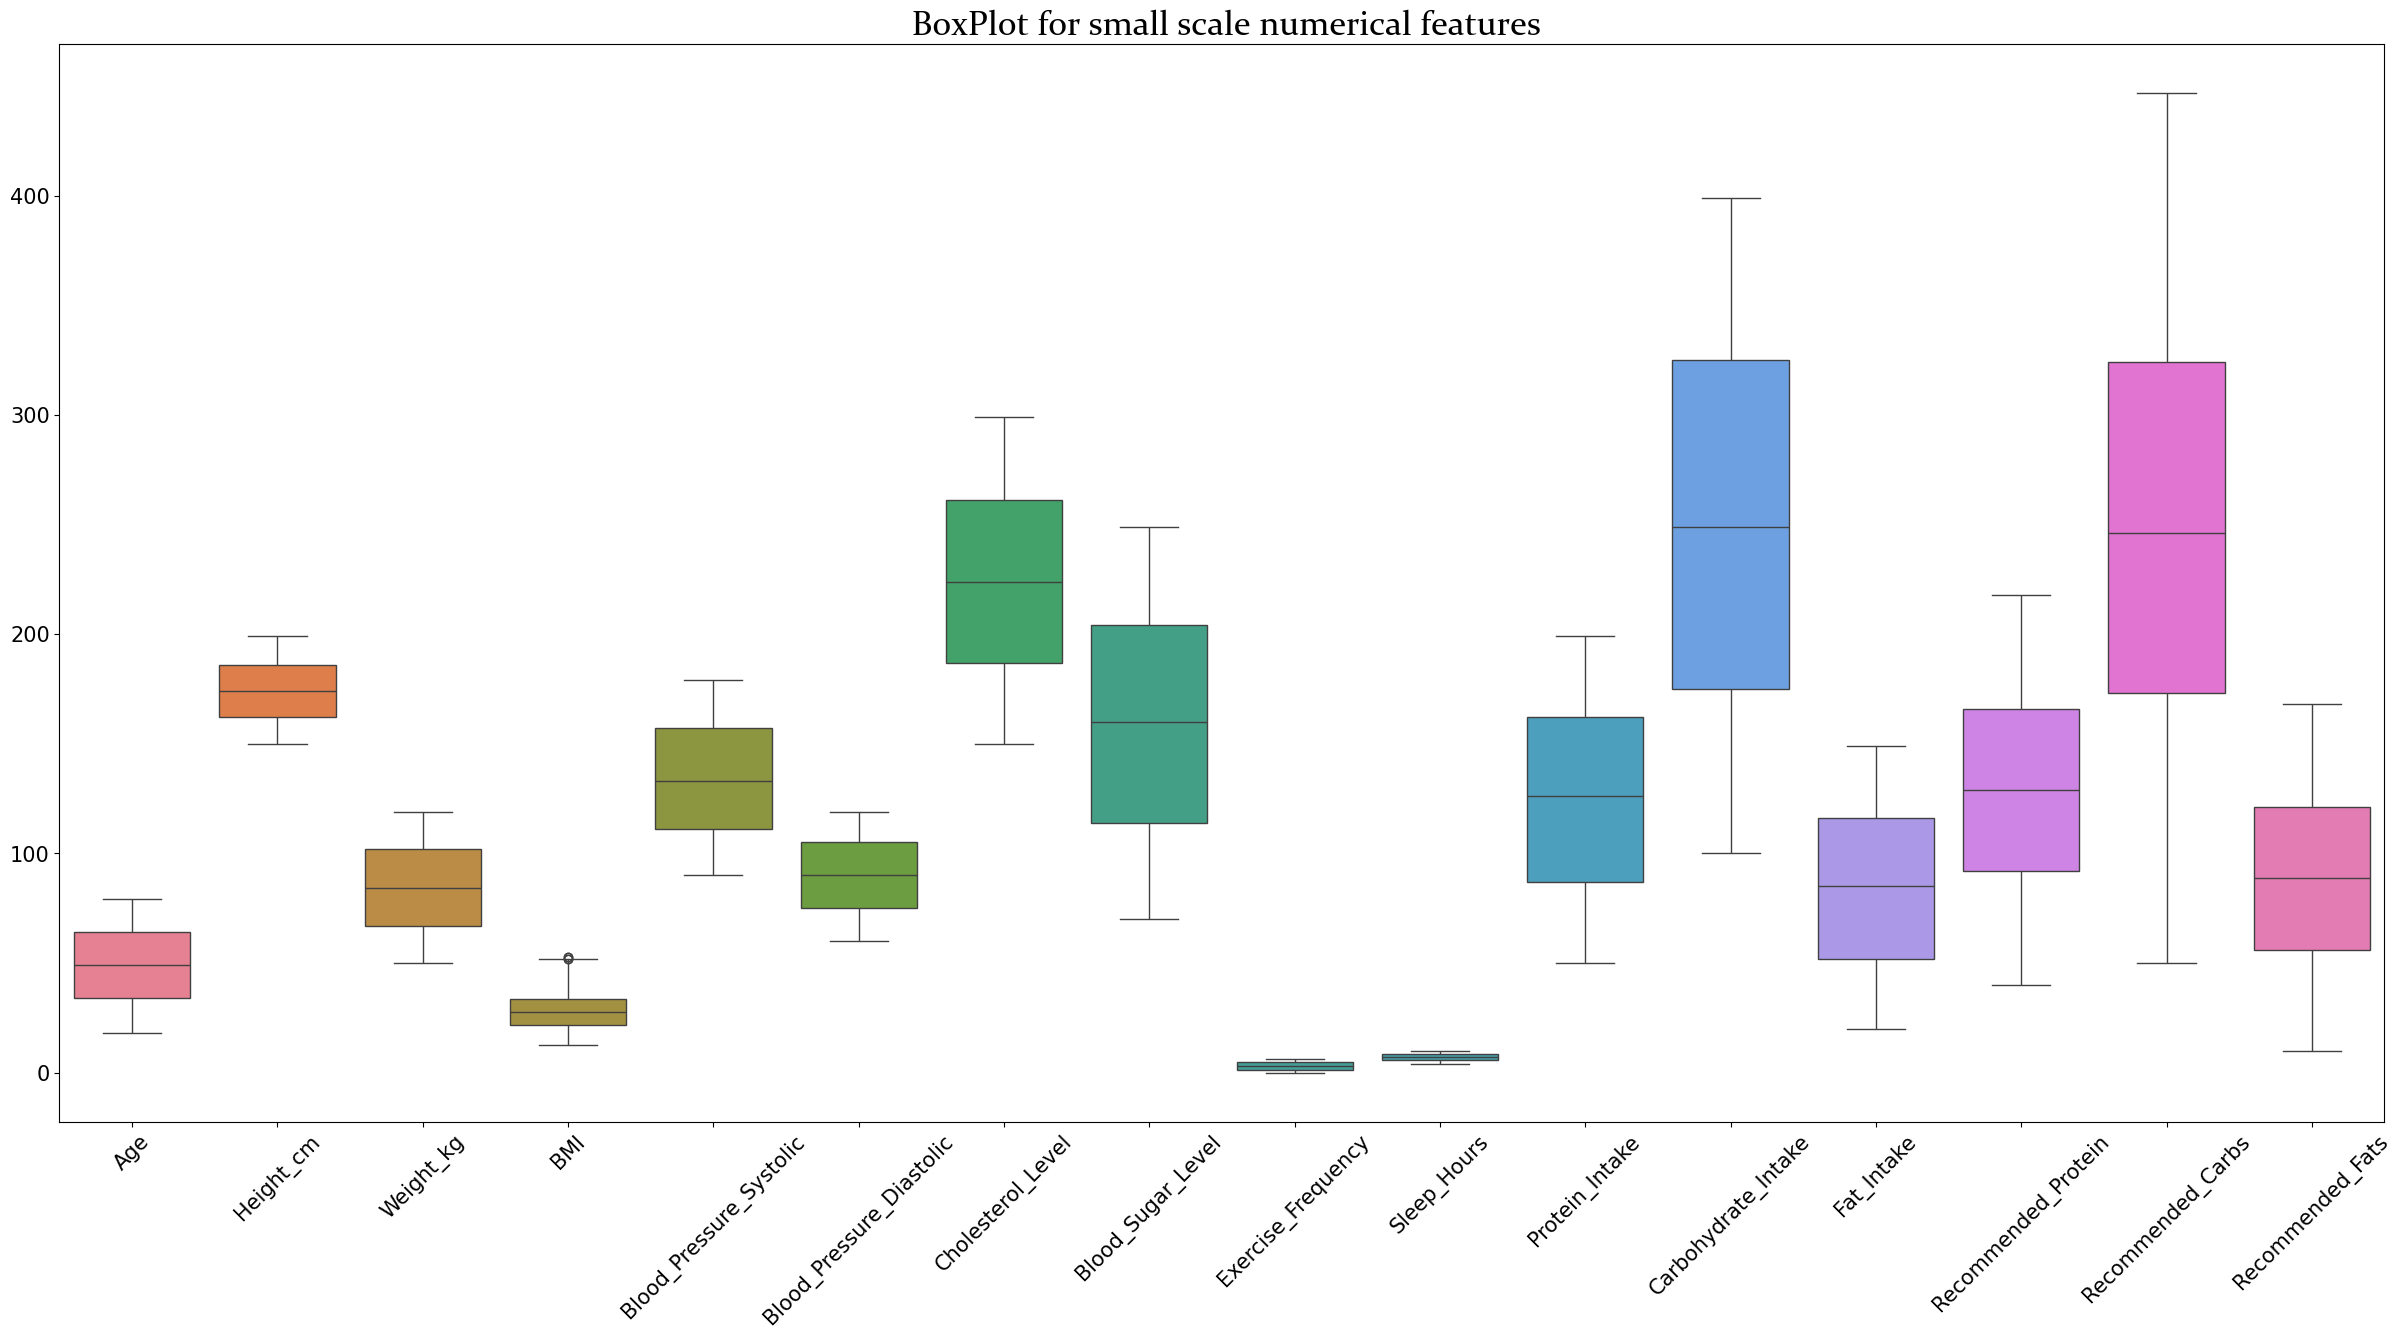

In [24]:
#Column for small scale numericl values
# small_outlier_col=['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_Level', 'Blood_Sugar_Level', 'Exercise_Frequency', 'Sleep_Hours','Protein_Intake', 'Carbohydrate_Intake', 'Fat_Intake', 'Recommended_Protein', 'Recommended_Carbs', 'Recommended_Fats']

small_outlier_col=df[outlier_columns].drop(columns=large_outlier_col,axis=1).columns
plt.figure(figsize=(30,14))
sns.boxplot(data=df[small_outlier_col])
plt.title(" BoxPlot for small scale numerical features",fontsize=25,fontname='Constantia')
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)


`Detecting Outliers Using the IQR Method:`

In [25]:
for i in outlier_columns:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)

    IQR= Q3-Q1

    upper_bound= Q3+1.5*IQR
    lower_bound= Q1-1.5*IQR
    
    print(f'-----------------{i}----------------')
    print('upper_bound:',upper_bound)
    print('lower_bound:',lower_bound)

    #Identifying Upperbound Outliers
    upper_array=np.array(df[i]>upper_bound)
    print(f'Number of upper Bound Outliers: {upper_array.sum()}.\n')

    #Identifying Outlier in lowerbound
    lower_array=np.array(df[i]<lower_bound)
    print(f'Number of lower bound outliers: {lower_array.sum()}.\n')

-----------------Age----------------
upper_bound: 109.0
lower_bound: -11.0
Number of upper Bound Outliers: 0.

Number of lower bound outliers: 0.

-----------------Height_cm----------------
upper_bound: 222.0
lower_bound: 126.0
Number of upper Bound Outliers: 0.

Number of lower bound outliers: 0.

-----------------Weight_kg----------------
upper_bound: 154.5
lower_bound: 14.5
Number of upper Bound Outliers: 0.

Number of lower bound outliers: 0.

-----------------BMI----------------
upper_bound: 51.756249999999994
lower_bound: 3.9062500000000036
Number of upper Bound Outliers: 4.

Number of lower bound outliers: 0.

-----------------Blood_Pressure_Systolic----------------
upper_bound: 226.0
lower_bound: 42.0
Number of upper Bound Outliers: 0.

Number of lower bound outliers: 0.

-----------------Blood_Pressure_Diastolic----------------
upper_bound: 150.0
lower_bound: 30.0
Number of upper Bound Outliers: 0.

Number of lower bound outliers: 0.

-----------------Cholesterol_Level--------

### 📌 Outlier Detection Summary

We used the **Interquartile Range (IQR) method** to identify potential outliers across selected numerical columns. The purpose was to detect any extreme values that may impact model performance or mislead visual analysis.

After visualizing the data using a **Boxplot**, we concluded that:

- There are **no extreme or invalid outliers**; all minimum and maximum values appear to be within a logical and acceptable range.
- Although some values are statistically outside the IQR bounds, they are not necessarily incorrect or abnormal based on domain knowledge (e.g., Age 18, Protein Intake 50g, Sleep Hours 4).
- Therefore, **no imputation or replacement** using mean or median was performed.
- All features are **retained as-is** for further modeling or analysis to preserve the integrity and variability of the dataset.

📊 **Conclusion**: Outliers identified by the IQR method are acceptable and do not require removal or correction.


# CREATING NEW TARGET VARIABLE

In [26]:
def calculate_risk(row):
    score = 0

    # 1. BMI
    if row['BMI'] < 18.5 or row['BMI'] >= 40:
        score += 2  # Very underweight or severely obese
    elif 30 <= row['BMI'] < 40:
        score += 2  # Obese
    elif 25 <= row['BMI'] < 30:
        score += 1  # Overweight

    # 2. Blood Pressure
    if row['Blood_Pressure_Systolic'] > 140 or row['Blood_Pressure_Diastolic'] > 90:
        score += 2
    elif (120 <= row['Blood_Pressure_Systolic'] <= 140) or (80 <= row['Blood_Pressure_Diastolic'] <= 90):
        score += 1

    # 3. Cholesterol_Level
    if row['Cholesterol_Level'] > 240:
        score += 2
    elif 200 <= row['Cholesterol_Level'] <= 239:
        score += 1

    # 4. Blood_Sugar_Level
    if row['Blood_Sugar_Level'] > 125:
        score += 2
    elif 100 <= row['Blood_Sugar_Level'] <= 125:
        score += 1

    # 5. Genetic_Risk_Factor
    if row['Genetic_Risk_Factor'] == 'Yes' or row['Genetic_Risk_Factor'] == 1:
        score += 2

    # 6. Exercise_Frequency (days/week)
    if row['Exercise_Frequency'] <= 1:
        score += 2
    elif 2 <= row['Exercise_Frequency'] <= 4:
        score += 1

    # 7. Smoking_Habit
    if str(row['Smoking_Habit']).lower() == 'regular':
        score += 2
    elif str(row['Smoking_Habit']).lower() == 'occasional':
        score += 1

    # 8. Alcohol_Consumption
    if str(row['Alcohol_Consumption']).lower() == 'regular':
        score += 2
    elif str(row['Alcohol_Consumption']).lower() == 'occasional':
        score += 1

    # 9. Sleep_Hours
    if row['Sleep_Hours'] < 5 or row['Sleep_Hours'] > 9:
        score += 2
    elif 5 <= row['Sleep_Hours'] < 6 or 8 < row['Sleep_Hours'] <= 9:
        score += 1

    # Final risk classification
    if score >= 10:
        return 'High'
    elif 5 <= score < 10:
        return 'Medium'
    else:
        return 'Low'

# Apply the risk calculation to the DataFrame
df['Future_Health_Risk'] = df.apply(calculate_risk, axis=1)

In [27]:
df['Future_Health_Risk'].value_counts()

Future_Health_Risk
Medium    3494
High      1236
Low        270
Name: count, dtype: int64

# `Finding correlation between numeric columns`

In [28]:
#creating a new column for target variable to find the correlation

df['Future_Risk_ENCODED']=df['Future_Health_Risk'].map({'Low':0,'Medium':1,'High':2})

In [29]:
# df[['Exercise_Frequency','Daily_Steps','Height_cm','Protein_Intake','Fat_Intake','Recommended_Protein','Future_Risk_ENCODED']].head(5)
df[['Future_Risk_ENCODED']].head(5)

,Future_Risk_ENCODED
0,0
1,1
2,1
3,2
4,2


In [30]:
correlation_metrix=df.corr(numeric_only=True)
correlation_metrix

,Age,Height_cm,Weight_kg,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Blood_Sugar_Level,Daily_Steps,Exercise_Frequency,Sleep_Hours,Caloric_Intake,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats,Future_Risk_ENCODED
Age,1.000000,0.005843,0.033080,0.022849,0.005271,0.022698,0.003172,0.007933,0.024323,0.009644,0.008209,0.014506,-0.003016,-0.018246,0.029227,0.019669,-0.004594,-0.020135,0.030026,0.022001
Height_cm,0.005843,1.000000,0.000501,-0.558519,0.000086,0.009622,0.004131,0.000557,0.000497,-0.000951,-0.036066,-0.015560,-0.003539,0.009619,-0.011235,-0.014179,-0.007468,0.000816,-0.008425,-0.069773
Weight_kg,0.033080,0.000501,1.000000,0.815527,0.001545,-0.016910,-0.011841,0.001550,-0.004654,0.007513,-0.014226,-0.000563,-0.003218,0.007077,0.001712,-0.001288,0.000336,0.001005,0.009315,0.149074
BMI,0.022849,-0.558519,0.815527,1.000000,0.002057,-0.017531,-0.014883,-0.002753,-0.003732,0.006282,0.007551,0.007899,0.002302,-0.000069,0.006104,0.006857,0.007274,-0.000908,0.011086,0.173248
Blood_Pressure_Systolic,0.005271,0.000086,0.001545,0.002057,1.000000,0.017721,-0.006686,0.009268,-0.027770,-0.006702,0.003148,0.018216,-0.004135,-0.001881,0.022935,0.021082,-0.000779,0.004294,0.017316,0.130392
Blood_Pressure_Diastolic,0.022698,0.009622,-0.016910,-0.017531,0.017721,1.000000,0.005101,0.022220,-0.016266,0.002632,0.001194,0.019554,-0.003078,-0.035015,-0.001066,0.020366,-0.004311,-0.027155,-0.001514,0.157758
Cholesterol_Level,0.003172,0.004131,-0.011841,-0.014883,-0.006686,0.005101,1.000000,0.009241,-0.001558,-0.002640,-0.006886,-0.000348,-0.019343,0.011786,0.007566,0.001834,-0.020595,0.004692,0.011919,0.319727
Blood_Sugar_Level,0.007933,0.000557,0.001550,-0.002753,0.009268,0.022220,0.009241,1.000000,-0.039939,-0.020304,0.004290,-0.004920,-0.018900,0.000309,0.010571,-0.006006,-0.021132,-0.001278,0.013698,0.247602
Daily_Steps,0.024323,0.000497,-0.004654,-0.003732,-0.027770,-0.016266,-0.001558,-0.039939,1.000000,-0.007533,-0.014771,0.005166,-0.008663,-0.011699,-0.011952,0.006499,-0.013093,-0.015624,-0.010592,-0.014614
Exercise_Frequency,0.009644,-0.000951,0.007513,0.006282,-0.006702,0.002632,-0.002640,-0.020304,-0.007533,1.000000,-0.024796,0.026860,-0.007879,0.010534,0.018555,0.023116,-0.004554,0.006745,0.018311,-0.276835


<Axes: >

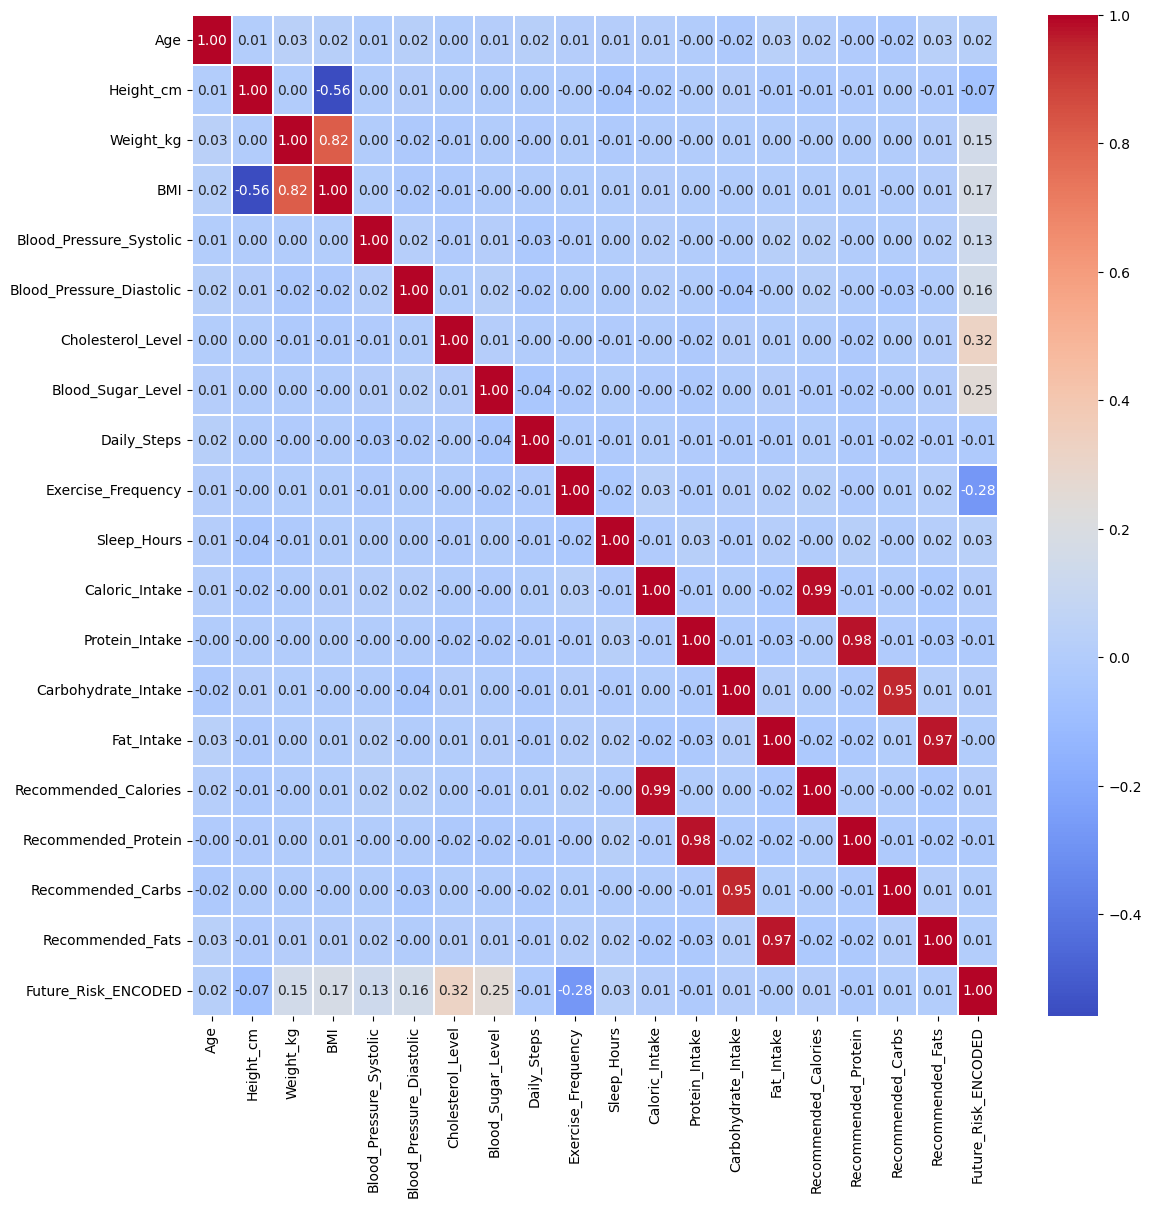

In [31]:
plt.figure(figsize=(13,13))

sns.heatmap(correlation_metrix,annot=True,cmap='coolwarm',fmt='0.2f',linewidths=0.2)

`Dropping a few columns that show negative correlation and keeping the ones that are logically important based on real-world understanding`

In [32]:
df['Calorie_Deficit'] = df['Recommended_Calories'] - df['Caloric_Intake']
df['Protein_Deficit'] = df['Recommended_Protein'] - df['Protein_Intake']
df['Carbs_Deficit'] = df['Recommended_Carbs'] - df['Carbohydrate_Intake']
df['Fats_Deficit'] = df['Recommended_Fats'] - df['Fat_Intake']


In [33]:
df1= df[['Recommended_Calories','Caloric_Intake','Calorie_Deficit']]
df1

,Recommended_Calories,Caloric_Intake,Calorie_Deficit
0,2150,2593,-443
1,1527,1852,-325
2,2359,2737,-378
3,2858,3289,-431
4,1937,2405,-468
...,...,...,...
4995,2869,3284,-415
4996,1138,1325,-187
4997,2893,3292,-399
4998,2201,2408,-207


In [34]:
# df.drop(columns=['Patient_ID','Height_cm','Daily_Steps','Future_risk_Encoded','Caloric_Intake','Protein_Intake','Carbohydrate_Intake','Fat_Intake','Recommended_Calories','Recommended_Protein','Recommended_Carbs','Recommended_Fats'],axis=1,inplace=True)
df.drop(columns=['Patient_ID','Height_cm','Daily_Steps','Caloric_Intake','Protein_Intake','Carbohydrate_Intake','Fat_Intake','Recommended_Calories','Recommended_Protein','Recommended_Carbs','Recommended_Fats'],axis=1,inplace=True)

In [35]:
df['Exercise_Frequency'].unique()  #not continuous so should be included in Chi square test

array([5, 1, 3, 2, 4, 0, 6], dtype=int64)

<Axes: >

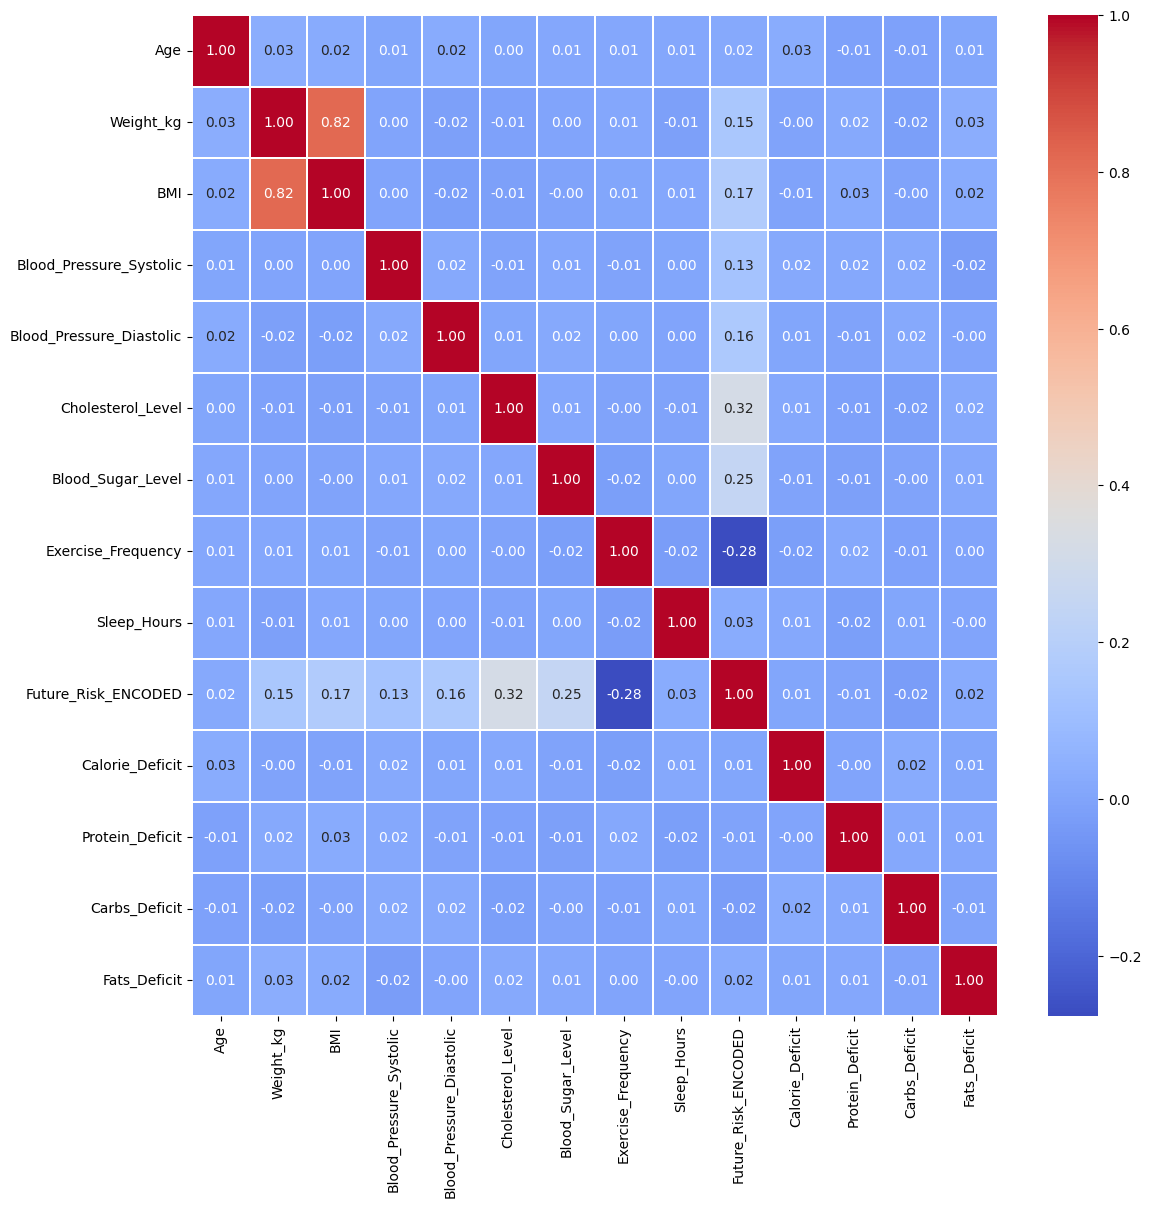

In [36]:
corre1=df.corr(numeric_only=True)
plt.figure(figsize=(13,13))
sns.heatmap(corre1,annot=True,fmt='0.2f',linewidths=0.2,cmap='coolwarm')

In [37]:
df.dtypes

Age                           int64
Gender                       object
Weight_kg                     int64
BMI                         float64
Chronic_Disease              object
Blood_Pressure_Systolic       int64
Blood_Pressure_Diastolic      int64
Cholesterol_Level             int64
Blood_Sugar_Level             int64
Genetic_Risk_Factor          object
Allergies                    object
Exercise_Frequency            int64
Sleep_Hours                 float64
Alcohol_Consumption          object
Smoking_Habit                object
Dietary_Habits               object
Preferred_Cuisine            object
Food_Aversions               object
Future_Health_Risk           object
Future_Risk_ENCODED           int64
Calorie_Deficit               int64
Protein_Deficit               int64
Carbs_Deficit                 int64
Fats_Deficit                  int64
dtype: object

dropping the encoded column 'Future_Risk_ENCODED' which is no Longer needed

In [38]:
# df.drop(columns=['Future_Risk_ENCODED'],axis=1,inplace=True)

# `CHI SQUARE TEST` 

In [39]:
import scipy.stats as stats

#Define categorical variables to test against 'Drug'
categorical_vars=['Gender',
 'Chronic_Disease',
 'Genetic_Risk_Factor',
 'Allergies',
 'Exercise_Frequency',
 'Alcohol_Consumption',
 'Smoking_Habit',
 'Dietary_Habits',
 'Preferred_Cuisine',
 'Food_Aversions']

#Significance level
alpha=0.05

#Loop through each catagorical values to peroform Chi square test

for var in categorical_vars:
    
    print(f'.\n--------Chi-Square Test for {var} vs Future_Health_Risk ------------')

    #Create contigency table
    contig_table=pd.crosstab(df[var],df['Future_Health_Risk'])

    #Peform chi square test
    chi,p,dof,expected= stats.chi2_contingency(contig_table)

    #print results
    print(f'Chi-square statistics:{chi}')
    print(f'P- Value: {p}')
    print(f'Degrees of freedom : {dof}')

    if p<alpha:
        print(f'There is significance relationship between {var} and Future_Health_Risk .\n')
    else:
        print(f'No significance relationship between {var} and Future_Health_Risk .\n')

.
--------Chi-Square Test for Gender vs Future_Health_Risk ------------
Chi-square statistics:3.135290458884054
P- Value: 0.5354455881503102
Degrees of freedom : 4
No significance relationship between Gender and Future_Health_Risk .

.
--------Chi-Square Test for Chronic_Disease vs Future_Health_Risk ------------
Chi-square statistics:9.787757244113221
P- Value: 0.2802397786558106
Degrees of freedom : 8
No significance relationship between Chronic_Disease and Future_Health_Risk .

.
--------Chi-Square Test for Genetic_Risk_Factor vs Future_Health_Risk ------------
Chi-square statistics:792.3447634709461
P- Value: 8.800771186701339e-173
Degrees of freedom : 2
There is significance relationship between Genetic_Risk_Factor and Future_Health_Risk .

.
--------Chi-Square Test for Allergies vs Future_Health_Risk ------------
Chi-square statistics:4.481525364218581
P- Value: 0.6118049588069892
Degrees of freedom : 6
No significance relationship between Allergies and Future_Health_Risk .

.
--

In [40]:
df.drop(columns=['Preferred_Cuisine','Food_Aversions','Chronic_Disease'],axis=1,inplace=True)

                               Age  Weight_kg       BMI  \
Age                       1.000000   0.033080  0.022849   
Weight_kg                 0.033080   1.000000  0.815527   
BMI                       0.022849   0.815527  1.000000   
Blood_Pressure_Systolic   0.005271   0.001545  0.002057   
Blood_Pressure_Diastolic  0.022698  -0.016910 -0.017531   
Cholesterol_Level         0.003172  -0.011841 -0.014883   
Blood_Sugar_Level         0.007933   0.001550 -0.002753   
Exercise_Frequency        0.009644   0.007513  0.006282   
Sleep_Hours               0.008209  -0.014226  0.007551   
Future_Risk_ENCODED       0.022001   0.149074  0.173248   
Calorie_Deficit           0.031584  -0.004284 -0.005291   
Protein_Deficit          -0.008261   0.017862  0.025489   
Carbs_Deficit            -0.008880  -0.018039 -0.002658   
Fats_Deficit              0.006414   0.034039  0.022794   

                          Blood_Pressure_Systolic  Blood_Pressure_Diastolic  \
Age                                

<Axes: >

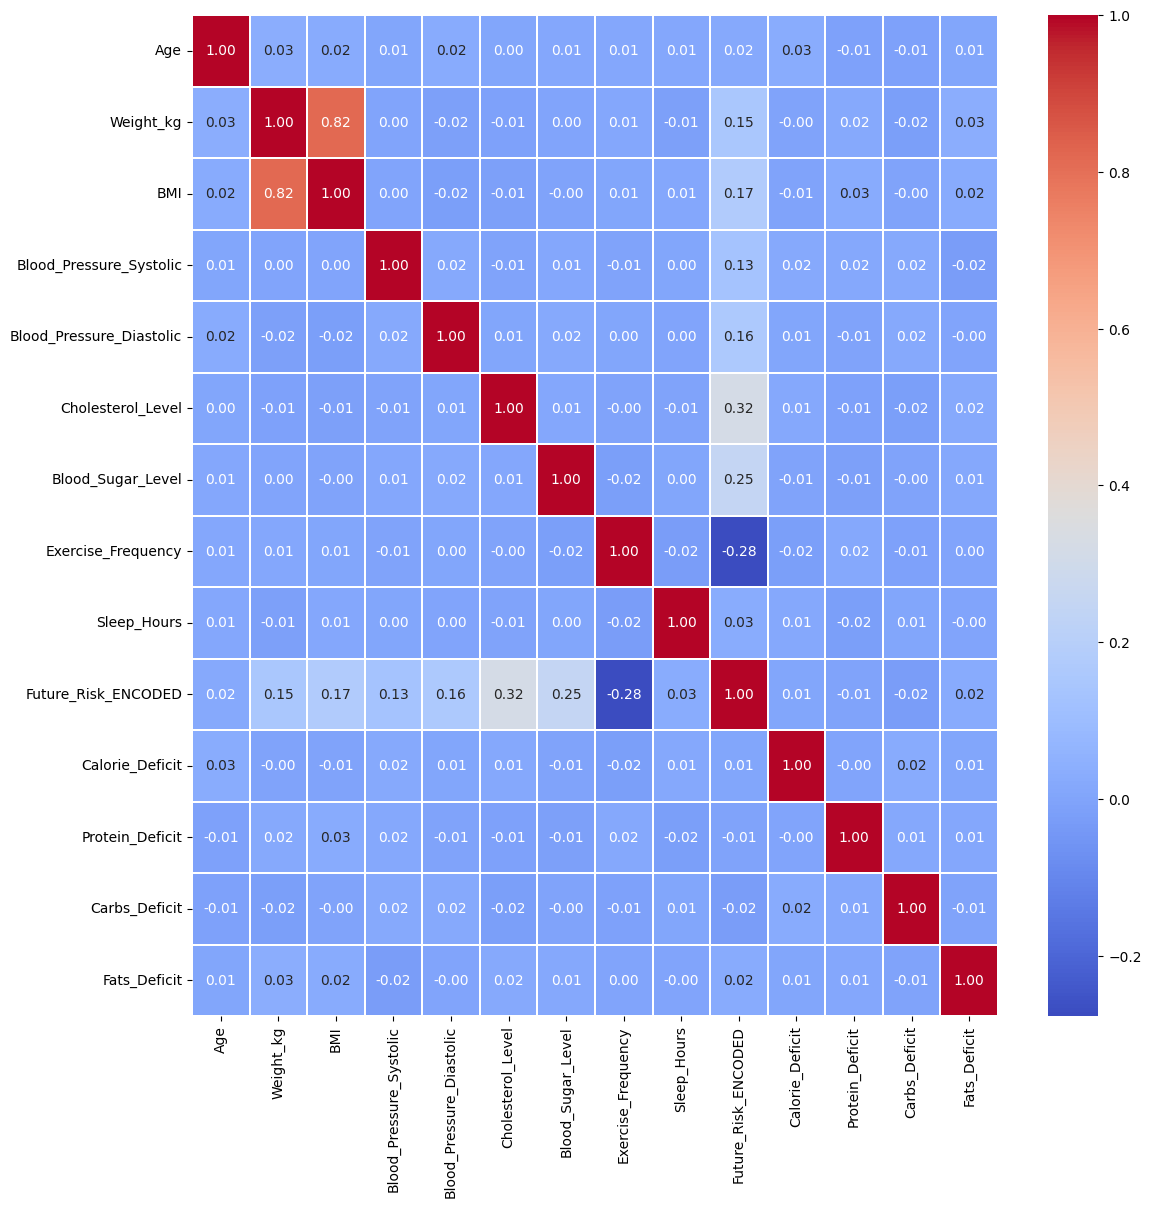

In [41]:
corre1=df.corr(numeric_only=True)
print(corre1)
plt.figure(figsize=(13,13))
sns.heatmap(corre1,annot=True,fmt='0.2f',linewidths=0.2,cmap='coolwarm')

In [42]:
df.drop(columns='Future_Risk_ENCODED',axis=1,inplace=True)

In [43]:
df

,Age,Gender,Weight_kg,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Blood_Sugar_Level,Genetic_Risk_Factor,Allergies,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking_Habit,Dietary_Habits,Future_Health_Risk,Calorie_Deficit,Protein_Deficit,Carbs_Deficit,Fats_Deficit
0,56,Other,66,24.84,175,75,219,124,No,None,5,7.6,No,Yes,Vegetarian,Low,-443,3,-40,2
1,69,Female,114,38.99,155,72,208,72,No,None,1,6.3,Yes,No,Vegetarian,Medium,-325,5,-49,5
2,46,Female,119,40.22,137,101,171,145,No,Gluten Intolerance,3,9.9,No,No,Vegetarian,Medium,-378,-3,42,-5
3,32,Female,118,30.41,148,91,258,235,No,Nut Allergy,5,4.2,No,No,Vegetarian,High,-431,2,7,15
4,60,Female,109,44.79,160,109,260,248,Yes,None,2,9.0,No,No,Regular,High,-468,-1,19,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,42,Female,99,33.46,115,78,279,112,No,Gluten Intolerance,3,6.5,No,No,Vegetarian,Medium,-415,11,46,4
4996,39,Female,61,25.39,110,97,258,93,No,Gluten Intolerance,2,7.2,Yes,No,Keto,Medium,-187,12,49,-5
4997,48,Female,61,22.41,113,82,183,151,No,Nut Allergy,4,8.8,No,No,Regular,Medium,-399,-10,29,-7
4998,34,Other,82,35.96,105,75,248,153,Yes,None,5,7.0,No,Yes,Keto,Medium,-207,6,-30,-3


In [44]:
#ENCODING

from sklearn.preprocessing import LabelEncoder

lab=LabelEncoder()

object_columns=['Gender',
 'Genetic_Risk_Factor',
 'Allergies',
 'Alcohol_Consumption',
 'Smoking_Habit',
 'Dietary_Habits']

for i in object_columns:
    df[i]=lab.fit_transform(df[i])

In [45]:
df

,Age,Gender,Weight_kg,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Blood_Sugar_Level,Genetic_Risk_Factor,Allergies,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking_Habit,Dietary_Habits,Future_Health_Risk,Calorie_Deficit,Protein_Deficit,Carbs_Deficit,Fats_Deficit
0,56,2,66,24.84,175,75,219,124,0,2,5,7.6,0,1,3,Low,-443,3,-40,2
1,69,0,114,38.99,155,72,208,72,0,2,1,6.3,1,0,3,Medium,-325,5,-49,5
2,46,0,119,40.22,137,101,171,145,0,0,3,9.9,0,0,3,Medium,-378,-3,42,-5
3,32,0,118,30.41,148,91,258,235,0,3,5,4.2,0,0,3,High,-431,2,7,15
4,60,0,109,44.79,160,109,260,248,1,2,2,9.0,0,0,1,High,-468,-1,19,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,42,0,99,33.46,115,78,279,112,0,0,3,6.5,0,0,3,Medium,-415,11,46,4
4996,39,0,61,25.39,110,97,258,93,0,0,2,7.2,1,0,0,Medium,-187,12,49,-5
4997,48,0,61,22.41,113,82,183,151,0,3,4,8.8,0,0,1,Medium,-399,-10,29,-7
4998,34,2,82,35.96,105,75,248,153,1,2,5,7.0,0,1,0,Medium,-207,6,-30,-3


In [46]:
df.dtypes

Age                           int64
Gender                        int32
Weight_kg                     int64
BMI                         float64
Blood_Pressure_Systolic       int64
Blood_Pressure_Diastolic      int64
Cholesterol_Level             int64
Blood_Sugar_Level             int64
Genetic_Risk_Factor           int32
Allergies                     int32
Exercise_Frequency            int64
Sleep_Hours                 float64
Alcohol_Consumption           int32
Smoking_Habit                 int32
Dietary_Habits                int32
Future_Health_Risk           object
Calorie_Deficit               int64
Protein_Deficit               int64
Carbs_Deficit                 int64
Fats_Deficit                  int64
dtype: object

In [47]:
x=df.drop(columns=['Future_Health_Risk','Calorie_Deficit','Protein_Deficit','Carbs_Deficit','Fats_Deficit'],axis=1)
y=df['Future_Health_Risk']
x

,Age,Gender,Weight_kg,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Blood_Sugar_Level,Genetic_Risk_Factor,Allergies,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking_Habit,Dietary_Habits
0,56,2,66,24.84,175,75,219,124,0,2,5,7.6,0,1,3
1,69,0,114,38.99,155,72,208,72,0,2,1,6.3,1,0,3
2,46,0,119,40.22,137,101,171,145,0,0,3,9.9,0,0,3
3,32,0,118,30.41,148,91,258,235,0,3,5,4.2,0,0,3
4,60,0,109,44.79,160,109,260,248,1,2,2,9.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,42,0,99,33.46,115,78,279,112,0,0,3,6.5,0,0,3
4996,39,0,61,25.39,110,97,258,93,0,0,2,7.2,1,0,0
4997,48,0,61,22.41,113,82,183,151,0,3,4,8.8,0,0,1
4998,34,2,82,35.96,105,75,248,153,1,2,5,7.0,0,1,0


In [48]:
#train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

,Age,Gender,Weight_kg,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Blood_Sugar_Level,Genetic_Risk_Factor,Allergies,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking_Habit,Dietary_Habits
1334,36,0,98,28.95,178,89,236,113,0,2,3,7.7,0,0,3
4768,34,1,87,25.98,124,112,158,202,1,1,0,10.0,1,0,1
65,31,2,86,31.59,100,87,277,168,0,0,1,8.4,0,0,0
177,20,2,96,28.98,113,112,223,109,1,2,5,8.8,0,0,1
4489,62,2,103,42.87,101,90,270,192,0,2,0,5.7,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,52,1,102,27.67,125,91,290,190,1,2,6,8.9,0,1,0
2763,79,1,52,17.78,123,92,246,119,0,2,3,9.4,1,0,1
905,62,1,82,23.70,177,99,293,244,1,1,4,9.0,0,0,0
3980,18,1,64,23.80,101,60,232,190,1,2,0,7.5,1,0,1


In [49]:
df['Future_Health_Risk'].value_counts()

#imbalanced data applying SMOTE

Future_Health_Risk
Medium    3494
High      1236
Low        270
Name: count, dtype: int64

`APPLYING SMOTE`

In [50]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=0)
x_resampled, y_resampled = adasyn.fit_resample(x_train, y_train)

from collections import Counter

print("before ADASYN:",Counter(y_train))
print("after ADASYN:",Counter(y_resampled))

before ADASYN: Counter({'Medium': 2437, 'High': 867, 'Low': 196})
after ADASYN: Counter({'High': 2549, 'Medium': 2437, 'Low': 2433})


`Since we are using Random Forest Model Avoiding Normalization` 

In [51]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(class_weight='balanced',random_state=42,n_estimators=50)
model.fit(x_resampled,y_resampled)

y_pred=model.predict(x_test)

In [52]:
y_pred

array(['Medium', 'Medium', 'High', ..., 'Medium', 'Medium', 'Medium'],
      dtype=object)

In [53]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report


score_accuracy=accuracy_score(y_test,y_pred)
score_accuracy

0.8486666666666667

In [54]:
y_train.unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [55]:
lab=['Medium', 'High', 'Low']
cm=confusion_matrix(y_test,y_pred,labels=lab)
cm

array([[914, 121,  22],
       [ 55, 314,   0],
       [ 29,   0,  45]], dtype=int64)

In [56]:
y_test.value_counts()

Future_Health_Risk
Medium    1057
High       369
Low         74
Name: count, dtype: int64

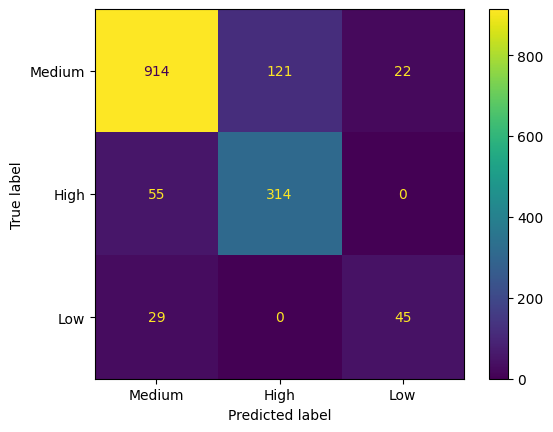

In [57]:
lab=['Medium', 'High', 'Low']
cmd=ConfusionMatrixDisplay(cm,display_labels=lab)
cmd.plot()

In [58]:
cr=classification_report(y_test,y_pred)

print(cr)

              precision    recall  f1-score   support

        High       0.72      0.85      0.78       369
         Low       0.67      0.61      0.64        74
      Medium       0.92      0.86      0.89      1057

    accuracy                           0.85      1500
   macro avg       0.77      0.77      0.77      1500
weighted avg       0.86      0.85      0.85      1500



In [59]:
x_train.columns

Index(['Age', 'Gender', 'Weight_kg', 'BMI', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Level', 'Blood_Sugar_Level',
       'Genetic_Risk_Factor', 'Allergies', 'Exercise_Frequency', 'Sleep_Hours',
       'Alcohol_Consumption', 'Smoking_Habit', 'Dietary_Habits'],
      dtype='object')

In [60]:
import pandas as pd

# STEP 1: Recommendation function
def give_recommendations(row, prediction):
    recommendations = []

    if prediction == 'High':
        recommendations.append("⚠️ High Risk: Immediate lifestyle changes recommended.")

        if row['Smoking_Habit'] == 1:
            recommendations.append("- 🚭 Consider quitting smoking.")
        if row['Alcohol_Consumption'] == 1:
            recommendations.append("- 🍷 Reduce or eliminate alcohol consumption.")
        if row['Dietary_Habits'] == 1:
            recommendations.append("- 🥦 Improve your diet: add more vegetables, fruits, and reduce junk food.")
        if row['Allergies'] == 1:
            recommendations.append("- 🤧 Avoid known allergens and consult an allergist if needed.")
        if row['Genetic_Risk_Factor'] == 1:
            recommendations.append("- 🧬 Regular screenings may help detect issues early due to genetic risks.")
        if row['Exercise_Frequency'] == 0:
            recommendations.append("- 🏃‍♂️ Start exercising regularly to improve cardiovascular health.")
        if row.get('Sleep_Habits', 1) == 0:
            recommendations.append("- 🛏️ Aim for 7–9 hours of sleep every night to improve overall health.")
        if row.get('Stress_Level', 0) == 1:
            recommendations.append("- 🧘‍♂️ Try stress-reducing activities like meditation or yoga.")
        if row.get('Medical_Checkups', 1) == 0:
            recommendations.append("- 🩺 Schedule regular medical check-ups to monitor your health.")

    elif prediction == 'Medium':
        recommendations.append("⚠️ Medium Risk: Be cautious and adjust your lifestyle.")

        if row['Dietary_Habits'] == 1:
            recommendations.append("- 🥦 Improve your diet.")
        if row['Smoking_Habit'] == 1:
            recommendations.append("- 🚭 Reduce or quit smoking.")
        if row['Alcohol_Consumption'] == 1:
            recommendations.append("- 🍷 Reduce alcohol consumption.")
        if row['Exercise_Frequency'] == 0:
            recommendations.append("- 🏃‍♂️ Add regular exercise to your routine.")
        if row.get('Sleep_Habits', 1) == 0:
            recommendations.append("- 🛏️ Try to maintain consistent, healthy sleep patterns.")

    else:
        recommendations.append("✅ Low Risk: You're doing well! Keep it up.")

        if row['Exercise_Frequency'] == 0:
            recommendations.append("- 🏃‍♂️ Consider adding regular physical activity.")
        if row.get('Sleep_Habits', 1) == 0:
            recommendations.append("- 🛏️ Stick to a consistent sleep schedule.")

    return "\n".join(recommendations)


# STEP 2: Input sample (edit values as needed)
new_row = {
    'Age': 30,
    'Gender': 'Male',
    'Weight_kg': 60,
    'BMI': 22,
    'Blood_Pressure_Systolic': 135,
    'Blood_Pressure_Diastolic': 70,
    'Cholesterol_Level': 140,
    'Blood_Sugar_Level': 80,
    'Genetic_Risk_Factor': 0,
    'Allergies': 0,
    'Exercise_Frequency':6,
    'Sleep_Hours': 8,
    'Alcohol_Consumption': 0,
    'Smoking_Habit': 0,
    'Dietary_Habits': 1,
    # 'Sleep_Habits': 0,         # Extra for recommendation logic
    # 'Stress_Level': 1,         # Extra for recommendation logic
    # 'Medical_Checkups': 0      # Extra for recommendation logic
}

# STEP 3: Convert to DataFrame for prediction
input_df = pd.DataFrame([new_row])

# Encode Gender
input_df['Gender'] = input_df['Gender'].map({'Male': 1, 'Female': 0})

# Step 4: Ensure only model-required columns are passed
model_input_columns = [
    'Age', 'Gender', 'Weight_kg', 'BMI', 'Blood_Pressure_Systolic',
    'Blood_Pressure_Diastolic', 'Cholesterol_Level', 'Blood_Sugar_Level',
    'Genetic_Risk_Factor', 'Allergies', 'Exercise_Frequency', 'Sleep_Hours',
    'Alcohol_Consumption', 'Smoking_Habit', 'Dietary_Habits'
]
model_input_df = input_df[model_input_columns]

# STEP 5: Make prediction using your trained model
prediction = model.predict(model_input_df)[0]  # Get the first value

# STEP 6: Print the prediction
print(f"Prediction: {prediction}")

# STEP 7: Print the recommendations
print("\nRecommendations:")
print(give_recommendations(new_row, prediction))


Prediction: Low

Recommendations:
✅ Low Risk: You're doing well! Keep it up.


In [61]:
import pickle
pickle.dump(model, open('your_saved_model.pkl', 'wb'))

In [62]:
import pickle
from sklearn.preprocessing import LabelEncoder

object_columns = [
    'Gender',
    'Genetic_Risk_Factor',
    'Allergies',
    'Alcohol_Consumption',
    'Smoking_Habit',
    'Dietary_Habits'
]

# Dictionary to store encoders
encoders = {}

# Apply LabelEncoder to each column and save encoder
for col in object_columns:
    lab = LabelEncoder()
    df[col] = lab.fit_transform(df[col])
    encoders[col] = lab
    # Save each encoder as a separate .pkl file
    with open(f'{col}_encoder.pkl', 'wb') as f:
        pickle.dump(lab, f)
